# CIPHER SCHOOLS Data Science Assignment

### I've listed all sections at once and then answered them in the respective order.

In [134]:
# Importing necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [135]:
# loading the dataset
df = pd.read_csv('input/haberman.csv', header=None, names=['Age', 'Op_Year', 'axil_nodes', 'Surv_status'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          306 non-null    int64
 1   Op_Year      306 non-null    int64
 2   axil_nodes   306 non-null    int64
 3   Surv_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


#### Observations: 
<ol>
<li>No null values that is the datase is complete</li>
<li>Convert 'status_after_5_years' column to categorical.</li>
<li>Yes-survived and No- Not Survived</li>
</ol>    

In [136]:
df["Surv_status"]=df["Surv_status"].map({1:'positive',2:'negative'})
df.head()

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,positive
1,30,62,3,positive
2,30,65,0,positive
3,31,59,2,positive
4,31,65,4,positive


## HIGH LEVEL STATISTICS 
<ol>
<li>number of points, </li>
<li>number of features, </li>
<li>number of classes,</li>
<li>data-points per class.</li>
</ol>    

In [137]:
print(df.describe())


              Age     Op_Year  axil_nodes
count  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144
std     10.803452    3.249405    7.189654
min     30.000000   58.000000    0.000000
25%     44.000000   60.000000    0.000000
50%     52.000000   63.000000    1.000000
75%     60.750000   65.750000    4.000000
max     83.000000   69.000000   52.000000


In [138]:
print("Number of rows: " + str(df.shape[0]))
print("Number of columns: " + str(df.shape[1]))
print("Columns: " + ", ".join(df.columns))


Number of rows: 306
Number of columns: 4
Columns: Age, Op_Year, axil_nodes, Surv_status


In [139]:
# How many data points for each class are present?
print(df.iloc[:,-1].value_counts())


positive    225
negative     81
Name: Surv_status, dtype: int64


In [140]:
# Number of classes
print(df['Surv_status'].nunique())

2


In [141]:
#Dividing the dataset into 2 datasets of positive and negative result.
positive=df.loc[df['Surv_status']=='positive']
negative=df.loc[df['Surv_status']=='negative']

### OUR OBJECTIVE

To identify if a patient will survive cancer treatment for more than 5 years or not based on his age, year_of_operation and no_of_positive_axillary_nodes

In [142]:
print (df.describe())

              Age     Op_Year  axil_nodes
count  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144
std     10.803452    3.249405    7.189654
min     30.000000   58.000000    0.000000
25%     44.000000   60.000000    0.000000
50%     52.000000   63.000000    1.000000
75%     60.750000   65.750000    4.000000
max     83.000000   69.000000   52.000000


In [143]:
print ("Age")
print ("  Mean:")
print ("  positive result- "+str(np.mean(positive["Age"])))
print ("  negative result- "+str(np.mean(negative["Age"])))
print ()
print ("  Standard Devation:")
print ("  positive result- "+str(np.std(positive["Age"])))
print ("  negative result- "+str(np.std(negative["Age"])))
print ()

print ()
print ("Year of Operation")
print ("  Mean:")
print ("  positive result- "+str(np.mean(positive["Op_Year"])))
print ("  negative result- "+str(np.mean(negative["Op_Year"])))
print ()
print ("  Standard Devation:")
print ("  positive result- "+str(np.std(positive["Op_Year"])))
print ("  negative result- "+str(np.std(negative["Op_Year"])))
print ()
print ()
print ("No of Auxillary Nodes")
print ("  Mean:")
print ("  positive result- "+str(np.mean(positive["axil_nodes"])))
print ("  negative result- "+str(np.mean(negative["axil_nodes"])))
print ()
print ("  Standard Devation:")
print ("  positive result- "+str(np.std(positive["axil_nodes"])))
print ("  negative result- "+str(np.std(negative["axil_nodes"])))

Age
  Mean:
  positive result- 52.01777777777778
  negative result- 53.67901234567901

  Standard Devation:
  positive result- 10.987655475100508
  negative result- 10.104182193031312


Year of Operation
  Mean:
  positive result- 62.86222222222222
  negative result- 62.82716049382716

  Standard Devation:
  positive result- 3.2157452144021947
  negative result- 3.3214236255207887


No of Auxillary Nodes
  Mean:
  positive result- 2.7911111111111113
  negative result- 7.45679012345679

  Standard Devation:
  positive result- 5.857258449412138
  negative result- 9.128776076761635


In [144]:
#90th percentile
print ('90th Percentile')
print ()
print ("Age")
print ("  positive result- "+str(np.percentile(positive["Age"],90)))
print ("  negative result- "+str(np.percentile(negative["Age"],90)))

print ("Year of Operation")
print ("  positive result- "+str(np.percentile(positive["Op_Year"],90)))
print ("  negative result- "+str(np.percentile(negative["Op_Year"],90)))

print ("No of Auxillary Nodes")
print ("  positive result- "+str(np.percentile(positive["axil_nodes"],90)))
print ("  negative result- "+str(np.percentile(negative["axil_nodes"],90)))
print ("  general result- "+str(np.percentile(df["axil_nodes"],90)))

90th Percentile

Age
  positive result- 67.0
  negative result- 67.0
Year of Operation
  positive result- 67.0
  negative result- 67.0
No of Auxillary Nodes
  positive result- 8.0
  negative result- 20.0
  general result- 13.0


This tells us a lot about the data we are dealing with.
<ol>
    <li>There is no missing data. </li>   
    <li>Age ranges from 30 to 83 </li>   
    <li>The age and year_of_operation do not have a huge impact on the patient's survival.</li>   
    <li>25% of the patients do not have any axillary node while 75% of them have less than 5 and it reaches to 13 for 90% of the patients.</li>   
</ol>    

Insights from 90th percentile:
------------------------------------------------
90% of patients had max. 13.0 positive nodes.
Which is very high compared to population mean or median

90% of SURVIVED patients had max. 8.0 positive nodes.

90% of DEAD patients had max. 20.0 positive nodes.

### UNIVARIATE ANALYSIS
> ### PDF and CDF
> **Probability Density Function** is a function of a continuous random variable, whose integral across an interval gives the probability that the value of the variable lies within the same interval. <br>
> **Cumulative Density Function** gives the cumulative sum of the PDF of the variable from minus infinity to that value.

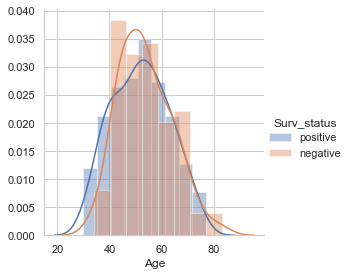

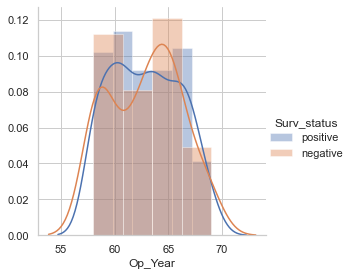

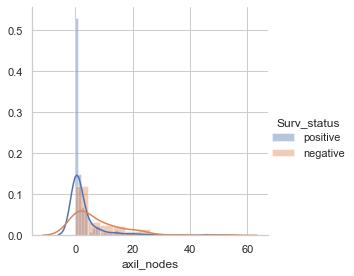

In [145]:
#PDF
sns.set_style("whitegrid")
for index, feature in enumerate(list(df.columns)[:-1]):
    sns.FacetGrid(df,hue='Surv_status',height=4).map(sns.distplot,feature).add_legend()
    plt.show()


********* Age *********
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]

********* Op_Year *********
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]

********* axil_nodes *********
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


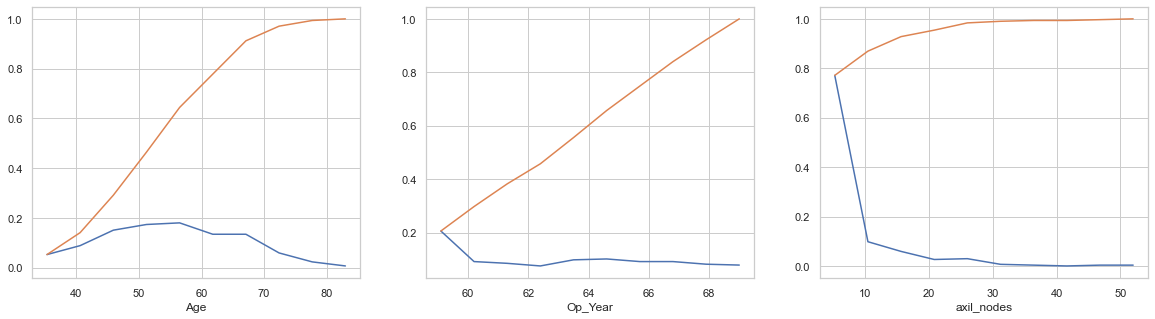

In [146]:
#CDF
plt.figure(figsize=(20,5))
for index, feature in enumerate(list(df.columns)[:-1]):
    plt.subplot(1, 3, index+1)
    print("\n********* "+feature+" *********")
    counts, bin_edges = np.histogram(df[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


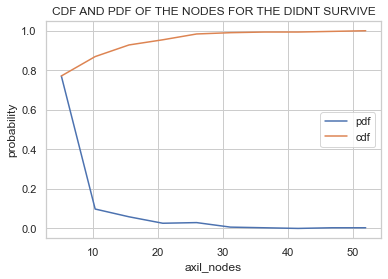

In [147]:
counts,bins=np.histogram(df['axil_nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bins)
cdf=np.cumsum(pdf)
plt.plot(bins[1:],pdf,label='pdf')
plt.plot(bins[1:],cdf,label='cdf')
plt.xlabel('axil_nodes')
plt.ylabel('probability')
plt.title("CDF AND PDF OF THE NODES FOR THE DIDNT SURVIVE")
plt.legend()
plt.show()

> ### Box Plots and Violin Plots
> **Box Plot** is a simple way of representing statistical data on a plot in which a rectangle is drawn to represent the second and third quartiles, usually with a vertical line inside to indicate the median value. The lower and upper quartiles are shown as horizontal lines either side of the rectangle.<br>
> **Violin Plots** are similar to box plots, except that they also show the probability density of the data at different values. It has four layers. The outer shape represents all possible results, with thickness indicating how common. The next layer inside represents the values that occur 95% of the time. The next layer (if it exists) inside represents the values that occur 50% of the time. The central dot represents the median average value.

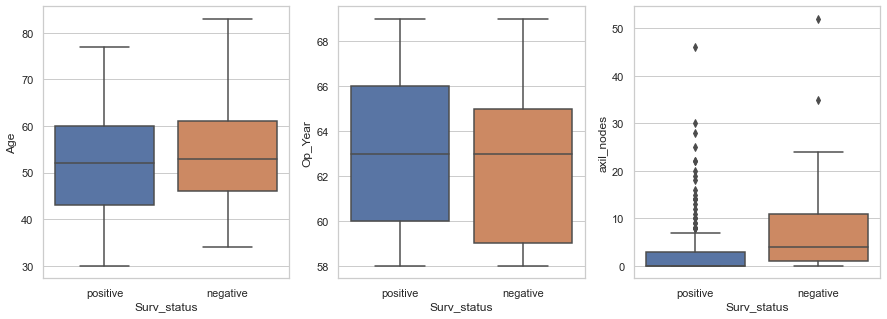

In [148]:
#Box Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    sns.boxplot( x='Surv_status', y=feature, data=df, ax=axes[idx])
plt.show()

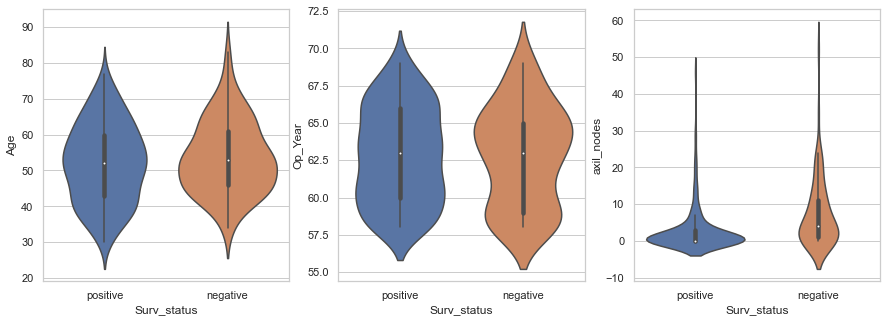

In [149]:
#Violin Plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    sns.violinplot( x='Surv_status', y=feature, data=df, ax=axes[idx])
plt.show()

### Observations:
<ol>
<li>The no of axillary nodes in patients with positive result is highly densed from 0 to 5.80% of patients with positive result have less than 6 axillary nodes.</li>
<li>The patients treated after 1966 have the slighlty higher chance to surive that the rest. The patients treated before 1959 have the slighlty lower chance to surive that the rest.</li>
<li>The patients with age less than 30 years have slightly higher chance of survival while patients with age more than 75 years have slightly lower chance of survival.</li>
</ol>    

### Bivariate Analysis
> ### Pair Plots
**Pair Plots** represent the relationship between different pair of features and the distribution of every feature over the dataset.
> ### Scatter Plot
**Scatter plot** is a useful visual representation of the relationship between two numerical variables (attributes) and is usually drawn before working out a linear correlation or fitting a regression line. The resulting pattern indicates the type (linear or non-linear) and strength of the relationship between two variables.

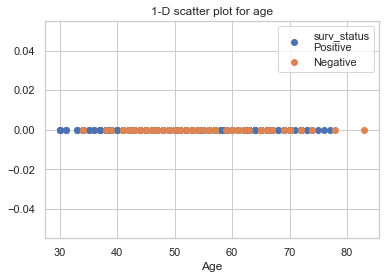

In [150]:
plt.plot(positive["Age"], np.zeros_like(positive["Age"]), 'o', label = "surv_status\n" "Positive")
plt.plot(negative["Age"], np.zeros_like(negative["Age"]), 'o', label = "Negative")
plt.title("1-D scatter plot for age")
plt.xlabel("Age")
plt.legend()
plt.show()

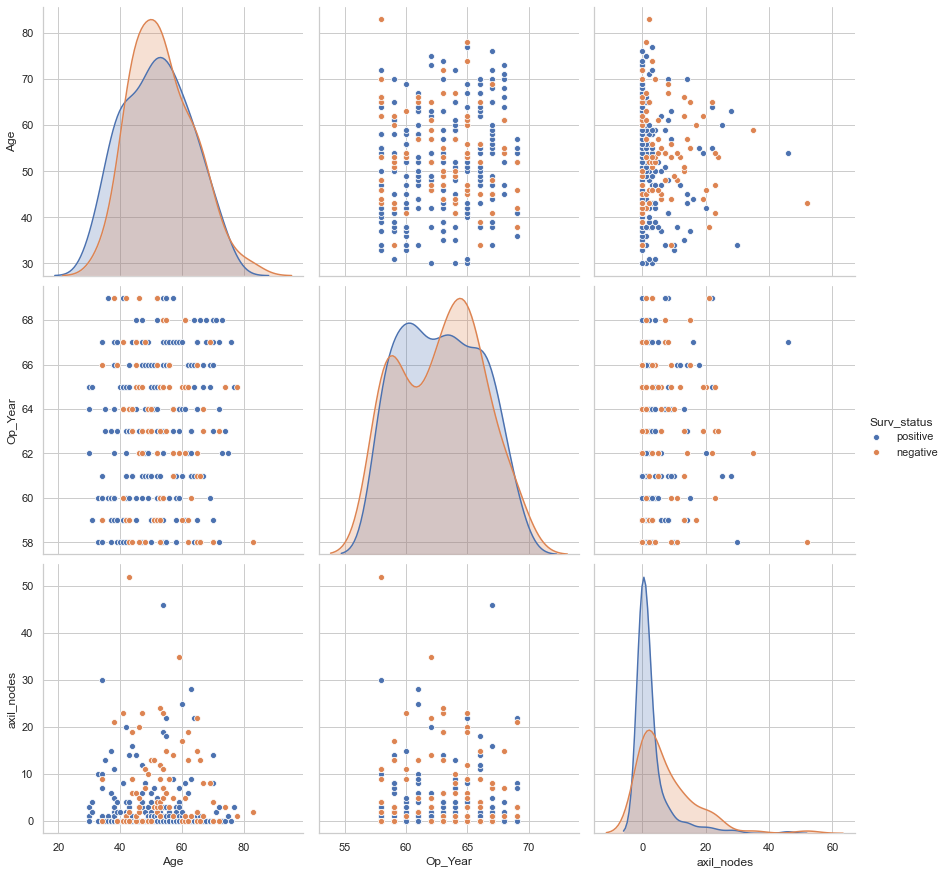

In [151]:
sns.set_style("whitegrid")
sns.pairplot(df,hue='Surv_status',height=4)
plt.show()

### Observations:
<ol>
<li>After looking at this plot we can easily count number of points that are there in age range who survived or not.</li>    
<li>Many person died whose age was between 41-70.</li> 
<li>No good separation can be done between the classes based on the pair plots.</ol>
<li>As we are unable to classify which is the most useful feature because of too much overlapping. But, Somehow we can say, In operation_year, 60-65 more person died who has less than 6 axillary_lymph_node.</li>
</ol>    

### FEATURE RANKING

In [154]:
df_small = df[['Age', 'Op_Year', 'axil_nodes', 'Surv_status']]


df_copy = pd.get_dummies(df_small)


df1 = df_copy
df1.head()
y = np.asarray(df1['Surv_status_positive'], dtype="|S6")
df1 = df1.drop(['Surv_status_positive','Surv_status_negative'], axis=1)
X = df1.values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30)

radm = RandomForestClassifier()
radm.fit(Xtrain, ytrain)

clf = radm
indices = np.argsort(radm.feature_importances_)[::-1]

# Print the feature ranking
print('Feature ranking:')

for f in range(df1.shape[1]):
   print('%d. feature %d %s (%f)' % (f + 1, indices[f], df1.columns[indices[f]], radm.feature_importances_[indices[f]]))
    


Feature ranking:
1. feature 0 Age (0.448441)
2. feature 2 axil_nodes (0.295800)
3. feature 1 Op_Year (0.255759)


### CONCLUSIONS

- With Feature Ranking it is clearly visible that Age plays a major role in the survival of the patient.
- The given dataset is imbalenced as it does not contains euqal number of data-points for each class.
- The given dataset is not linearly seprable form each class. There are too much overlapping in the data-points and hence it is very diffucult to classify.
- Younger people with age less than 30 yrs have a slightly higher chance of survival, whereas older people above the age of 75 years have slightly lower chance of survival.
-  With better technologies coming the rate of survival increased slightly for patients who where treated after 1966.
-  The max impact on survival is of the number of positive axillary lymph nodes found in the patient. The lesser the no of lymphs found the higher is the chance of survival.
-  90% of the patients have less than 8 and 20 axillary nodes for positive and negative result patients respectively.
-  The mean of no of axillary nodes is 2.8 for patients who survived for atleast 5 years and 8.5 for patients who didn't survive for 5 years.
